**Exploration and Analysis for Paris Traffic Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

About the dataset:

It includes the number of people who took the transport per day per station and per title category.

It includes only data from tramway, bus, subway and Regional Express Network of Paris and its suburbs.

Validation data does not include :
▪ Magnetic tickets (for example, the
T+ ticket, Mobilis package, Paris Visite package, etc.).

▪ Users who do not validate when boarding a bus or streetcar, or when entering a station (e.g. if the platform is accessible without going through a control barrier, or if the control barriers are unavailable due to works,
etc. )

▪ Fraudsters.

Title categories:

"IMAGINE R": combines the annual Imagine R School and Imagine R Student packages
reserved for pupils, apprentices and students which allows to travel at will all year round and in
all of Ile-de-France.


▪ "NAVIGO": includes the Navigo Annuel, Navigo Mois and Navigo Semaine packages.


▪ " AMETHYSTE ": includes the Amethyst packages: package reserved for seniors or
disabled under conditions of means or status, and residing in the Île-de-France region. This package
annual allows the beneficiary to move around unlimitedly on all modes of transport.
transport within the areas of validity.


▪ " TST ": groups together weekly and monthly reduced fare packages granted to beneficiaries
of the Transportation Solidarity Reduction program, to travel within the selected zones in all the
modes of transport in the Île-de-France region.(certain economic range)


▪ "FGT": accounts for the Navigo Gratuité Transport Packages, a package that allows certain
receiving social assistance to travel free of charge throughout the Paris Region.


▪ "OTHER TITLE": accounts for special packages.


▪ "NOT DEFINED": records validations for which the type of ticket is not defined (anomalies).

-1 in the column ID REFA LDA means that the data is not defined.

**Problem Statement: Forecast the no of people per Station per day**

In [ ]:
df = pd.read_csv('Travel_titles_validations_in_Paris_and_suburbs.csv')

In [ ]:
df.head(10)

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
0,21/07/2019,LA TOUR MAUBOURG,71242.0,NAVIGO,1141
1,21/07/2019,PARMENTIER,71801.0,NOT DEFINED,Less than 5
2,21/07/2019,PARMENTIER,71801.0,TST,97
3,21/07/2019,PEREIRE-LEVALLOIS,71453.0,FGT,53
4,21/07/2019,PERNETY,412687.0,OTHER,36
5,21/07/2019,PICPUS,71639.0,FGT,25
6,21/07/2019,PIERRE CURIE,70537.0,IMAGINE R,264
7,21/07/2019,PIGALLE,71409.0,DAILY NAVIGO,7
8,21/07/2019,PLACE DES FETES,71885.0,?,20
9,21/07/2019,PLACE DES FETES,71885.0,AMETHYSTE,297


In [ ]:
#Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883958 entries, 0 to 883957
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            883958 non-null  object 
 1   STATION_NAME    883958 non-null  object 
 2   ID_REFA_LDA     882459 non-null  float64
 3   TITLE_CATEGORY  883958 non-null  object 
 4   NB_VALID        883958 non-null  object 
dtypes: float64(1), object(4)
memory usage: 33.7+ MB


In [ ]:
df.shape

(883958, 5)

In [ ]:
df.describe()

,ID_REFA_LDA
count,882459.000000
mean,69150.277691
std,27606.821859
min,-1.000000
25%,66338.000000
50%,71158.000000
75%,71756.000000
max,415852.000000


In [ ]:
df.describe(include=object)

,DATE,STATION_NAME,TITLE_CATEGORY,NB_VALID
count,883958,883958,883958,883958
unique,184,686,9,17497
top,13/11/2019,GARE DE LYON,NAVIGO,Less than 5
freq,5704,4765,118260,128827


In [ ]:
df.isna().sum()

DATE                 0
STATION_NAME         0
ID_REFA_LDA       1499
TITLE_CATEGORY       0
NB_VALID             0
dtype: int64

In [ ]:
df.loc[df.duplicated()].sort_values(['DATE','STATION_NAME'])

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID
124970,1/10/2019,ALLEE DE LA TOUR RENDEZ-VOUS,-1.0,FGT,7
639410,1/10/2019,AULNAY-SOUS-BOIS,-1.0,?,Less than 5
639435,1/10/2019,AULNAY-SOUS-BOIS,-1.0,OTHER,Less than 5
150719,1/10/2019,GARGAN,-1.0,OTHER,Less than 5
639443,1/10/2019,GARGAN,-1.0,TST,Less than 5
...,...,...,...,...,...
535786,9/12/2019,LES COQUETIERS,-1.0,?,Less than 5
623872,9/12/2019,LES COQUETIERS,-1.0,TST,14
651249,9/12/2019,LES PAVILLONS-SOUS-BOIS,-1.0,NOT DEFINED,Less than 5
272238,9/9/2019,INVALIDES,71274.0,DAILY NAVIGO,Less than 5


In [ ]:
# So there are 1241 duplicate values lets keep first value only

In [ ]:
df.shape

(883958, 5)

In [ ]:
#Lets find the range of dates in dataset

In [ ]:
df['DATE']=pd.to_datetime(df['DATE'],format='%d/%m/%Y')

In [ ]:
df['DATE'].min(),df['DATE'].max()

(Timestamp('2019-07-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

The Dataset is from a period of 01 July 2019 to 31 December 2019 and we will find expected no of customers per day.

In [ ]:
df['DATE'].nunique()

184

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883958 entries, 0 to 883957
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            883958 non-null  datetime64[ns]
 1   STATION_NAME    883958 non-null  object        
 2   ID_REFA_LDA     882459 non-null  float64       
 3   TITLE_CATEGORY  883958 non-null  object        
 4   NB_VALID        883958 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 33.7+ MB


In [ ]:
# Now date column is coverted to datetime lets convert NB_VALID to int as its no of valid tickets.

In [ ]:
df['NB_VALID'].unique()

array(['1141', 'Less than 5', '97', ..., '14966', '22492', '10546'],
      dtype=object)

Here value less than 5 is a string value lets convert it to int

In [ ]:
df['NB_VALID'].value_counts()

Less than 5    128827
5               16523
6               13831
7               11906
8               10375
                ...  
12821               1
19983               1
49300               1
17474               1
10546               1
Name: NB_VALID, Length: 17497, dtype: int64

In [ ]:
df['NB_VALID']=df['NB_VALID'].replace('Less than 5',4)

In [ ]:
df['NB_VALID']=df['NB_VALID'].astype(int)

In [ ]:
# Unique title values

In [ ]:
df['TITLE_CATEGORY'].unique()

array(['NAVIGO', 'NOT DEFINED', 'TST', 'FGT', 'OTHER', 'IMAGINE R',
       'DAILY NAVIGO', '?', 'AMETHYSTE'], dtype=object)

Lets replace '?' with most frequent value

In [ ]:
si=SimpleImputer(missing_values='?',strategy='most_frequent')

In [ ]:
df['TITLE_CATEGORY']=pd.DataFrame(si.fit_transform(pd.DataFrame(df['TITLE_CATEGORY'])))

In [ ]:
df['TITLE_CATEGORY'].value_counts()

NAVIGO          221853
IMAGINE R       116219
FGT             112852
TST             112773
AMETHYSTE       110196
DAILY NAVIGO     80154
NOT DEFINED      67937
OTHER            61974
Name: TITLE_CATEGORY, dtype: int64

In [ ]:
# Other and Not defined resembles same meaning lets make it one

In [ ]:
df['TITLE_CATEGORY']=df['TITLE_CATEGORY'].replace('NOT DEFINED','OTHER')

In [ ]:
df['TITLE_CATEGORY'].value_counts()

NAVIGO          221853
OTHER           129911
IMAGINE R       116219
FGT             112852
TST             112773
AMETHYSTE       110196
DAILY NAVIGO     80154
Name: TITLE_CATEGORY, dtype: int64

In [ ]:
df['ID_REFA_LDA'].value_counts()

-1.0         25213
 73626.0      4765
 71517.0      4744
 71370.0      4307
 73620.0      3873
             ...  
 64622.0        12
 73602.0        11
 64246.0        10
 411284.0        6
 73334.0         5
Name: ID_REFA_LDA, Length: 668, dtype: int64

In [ ]:
# Lets check unique Station Names

In [ ]:
df['STATION_NAME'].unique()

array(['LA TOUR MAUBOURG', 'PARMENTIER', 'PEREIRE-LEVALLOIS', 'PERNETY',
       'PICPUS', 'PIERRE CURIE', 'PIGALLE', 'PLACE DES FETES',
       "PLACE D'ITALIE", 'PLAISANCE', 'BERCY',
       'PONT DE NEUILLY (AVENUE DE MADRID)', 'PONT DE SEVRES',
       'PONT-MARIE (CITE DES ARTS)', "PORTE D'AUTEUIL",
       'PORTE DE BAGNOLET', 'PORTE DE CHAMPERRET', 'PORTE DE CHOISY',
       'PORTE DE CLIGNANCOURT', 'PORTE DE LA CHAPELLE',
       'PORTE DE LA VILLETTE', 'PORTE DE MONTREUIL',
       'PORTE DE SAINT-CLOUD', 'RICHARD LENOIR', 'RIQUET', 'BILLANCOURT',
       'ROBESPIERRE', 'RUE DU BAC', 'GRANDS BOULEVARDS (RUE MONTMARTRE)',
       'SAINT-AUGUSTIN', 'BLANCHE', 'BASILIQUE DE SAINT-DENIS',
       'SAINT-DENIS-UNIVERSITE', 'SAINT-FARGEAU', 'SAINT-MANDE-TOURELLE',
       'SAINT-MARCEL', 'SAINT-MICHEL', 'SAINT-PAUL (LE MARAIS)',
       'SAINT-PHILIPPE-DU-ROULE', 'SAINT-PLACIDE',
       'SAINT-SEBASTIEN FROISSART', 'SAINT-SULPICE',
       'BOBIGNY-PABLO PICASSO', 'SEGUR', 'SENTIER', 'SEVRES-BABY

In [ ]:
df['STATION_NAME'].nunique()

686

There are 686 unique Stations in the dataset.

In [ ]:
df['STATION_NAME'].value_counts()

GARE DE LYON                        4765
LA DEFENSE-GRANDE ARCHE             4744
BIBLIOTHEQUE FRANCOIS MITTERRAND    3188
SAINT-LAZARE                        3170
GARE DU NORD                        3130
                                    ... 
NOTRE-DAME-DES-ANGES                 131
SAINT-GERMAIN-BEL-AIR-FOURQUEUX       17
SAINT-GERMAIN-GRANDE-CEINTURE         12
MAREIL-MARLY                          11
NOISY-LE-ROI                          10
Name: STATION_NAME, Length: 686, dtype: int64

In [ ]:
# Lets observe daywise ticket sales

In [ ]:
df.groupby('DATE')['NB_VALID'].sum()

DATE
2019-07-01    4637630
2019-07-02    5088713
2019-07-03    5086729
2019-07-04    5095661
2019-07-05    5065248
               ...   
2019-12-27     979572
2019-12-28     671291
2019-12-29     382137
2019-12-30    1034015
2019-12-31     827043
Name: NB_VALID, Length: 184, dtype: int64

Lets do some Monthwise and day of week wise analysis to gain more insights

In [ ]:
df['MONTH']=df['DATE'].dt.month
df['MONTH']

0         7
1         7
2         7
3         7
4         7
         ..
883953    9
883954    9
883955    9
883956    9
883957    9
Name: MONTH, Length: 883958, dtype: int64

In [ ]:
df['DAY']=df['DATE'].dt.day_name()
df['DAY']

0            Sunday
1            Sunday
2            Sunday
3            Sunday
4            Sunday
            ...    
883953    Wednesday
883954    Wednesday
883955    Wednesday
883956    Wednesday
883957    Wednesday
Name: DAY, Length: 883958, dtype: object

In [ ]:
df.head(10)

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID,MONTH,DAY
0,2019-07-21,LA TOUR MAUBOURG,71242.0,NAVIGO,1141,7,Sunday
1,2019-07-21,PARMENTIER,71801.0,OTHER,4,7,Sunday
2,2019-07-21,PARMENTIER,71801.0,TST,97,7,Sunday
3,2019-07-21,PEREIRE-LEVALLOIS,71453.0,FGT,53,7,Sunday
4,2019-07-21,PERNETY,412687.0,OTHER,36,7,Sunday
5,2019-07-21,PICPUS,71639.0,FGT,25,7,Sunday
6,2019-07-21,PIERRE CURIE,70537.0,IMAGINE R,264,7,Sunday
7,2019-07-21,PIGALLE,71409.0,DAILY NAVIGO,7,7,Sunday
8,2019-07-21,PLACE DES FETES,71885.0,NAVIGO,20,7,Sunday
9,2019-07-21,PLACE DES FETES,71885.0,AMETHYSTE,297,7,Sunday


In [ ]:
df['MONTH'].value_counts()

11    165125
10    164426
9     153202
7     152761
8     150625
12     97819
Name: MONTH, dtype: int64

In [ ]:
#Monthwise Ticket Sales

In [ ]:
df1=df.groupby('MONTH').agg({'NB_VALID':'sum'}).reset_index()
df1

,MONTH,NB_VALID
0,7,123202651
1,8,93143068
2,9,129339354
3,10,145371311
4,11,138588021
5,12,46673755


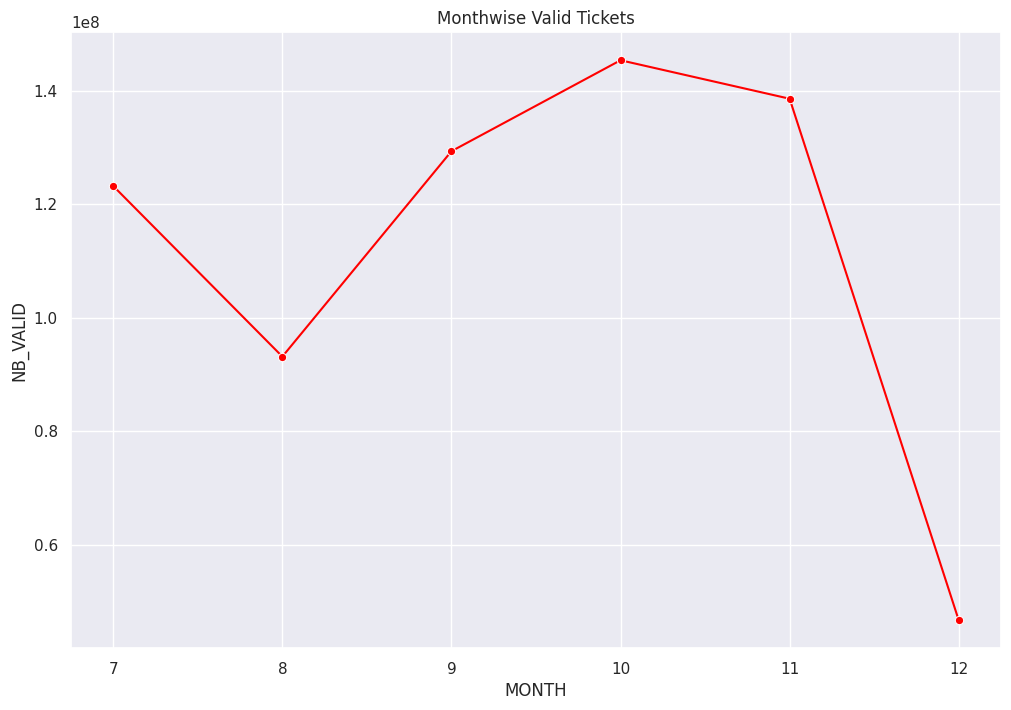

In [ ]:
sns.lineplot(data=df1,x='MONTH',y='NB_VALID',marker='o',color='red')
plt.title('Monthwise Valid Tickets')
plt.show()

In [ ]:
df2=df.groupby('DATE').agg({'NB_VALID':'sum'}).reset_index()
df2

,DATE,NB_VALID
0,2019-07-01,4637630
1,2019-07-02,5088713
2,2019-07-03,5086729
3,2019-07-04,5095661
4,2019-07-05,5065248
...,...,...
179,2019-12-27,979572
180,2019-12-28,671291
181,2019-12-29,382137
182,2019-12-30,1034015


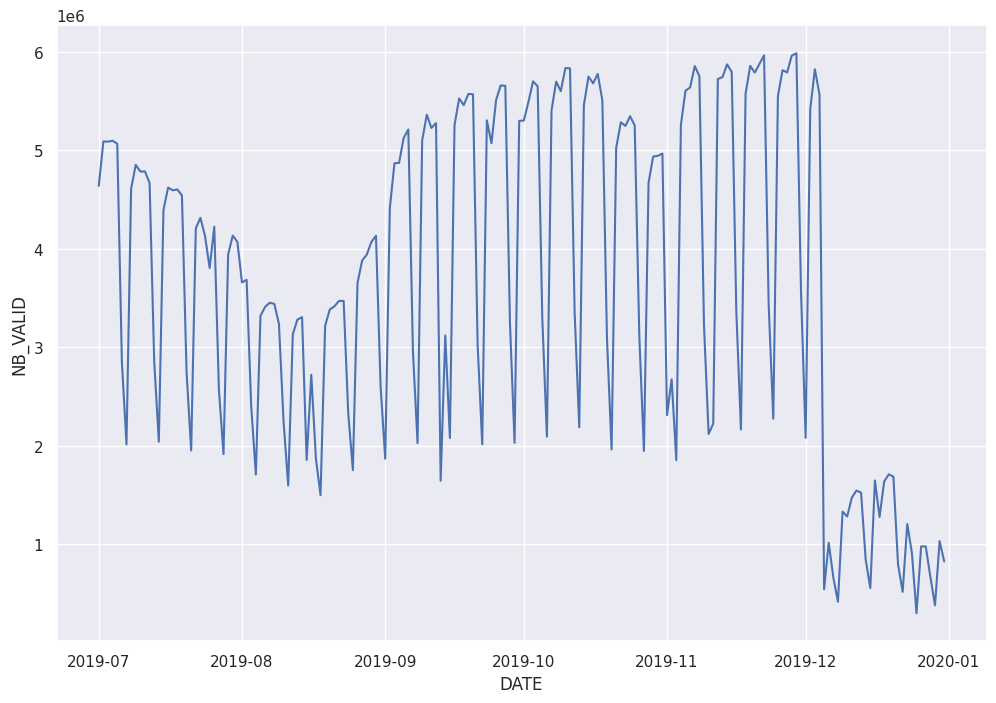

In [ ]:
sns.lineplot(data=df2,x='DATE',y='NB_VALID')
sns.set(rc={"figure.figsize": (16, 8)})



Here we can see no of valid tickets declining from July to August then see a sudden spike in September,October,November and a **Huge** decline in December.Also at every 3-4 days there is a dip we need to visualize this in detail.

In [ ]:
#Analyzing Valid tickets wrt month and title category

In [ ]:
df3=df.groupby(['MONTH','TITLE_CATEGORY']).agg({'NB_VALID':'sum'}).reset_index()
df3

,MONTH,TITLE_CATEGORY,NB_VALID
0,7,AMETHYSTE,3151962
1,7,DAILY NAVIGO,126867
2,7,FGT,4513252
3,7,IMAGINE R,15198691
4,7,NAVIGO,91917400
5,7,OTHER,779163
6,7,TST,7515316
7,8,AMETHYSTE,2652573
8,8,DAILY NAVIGO,128275
9,8,FGT,3931271


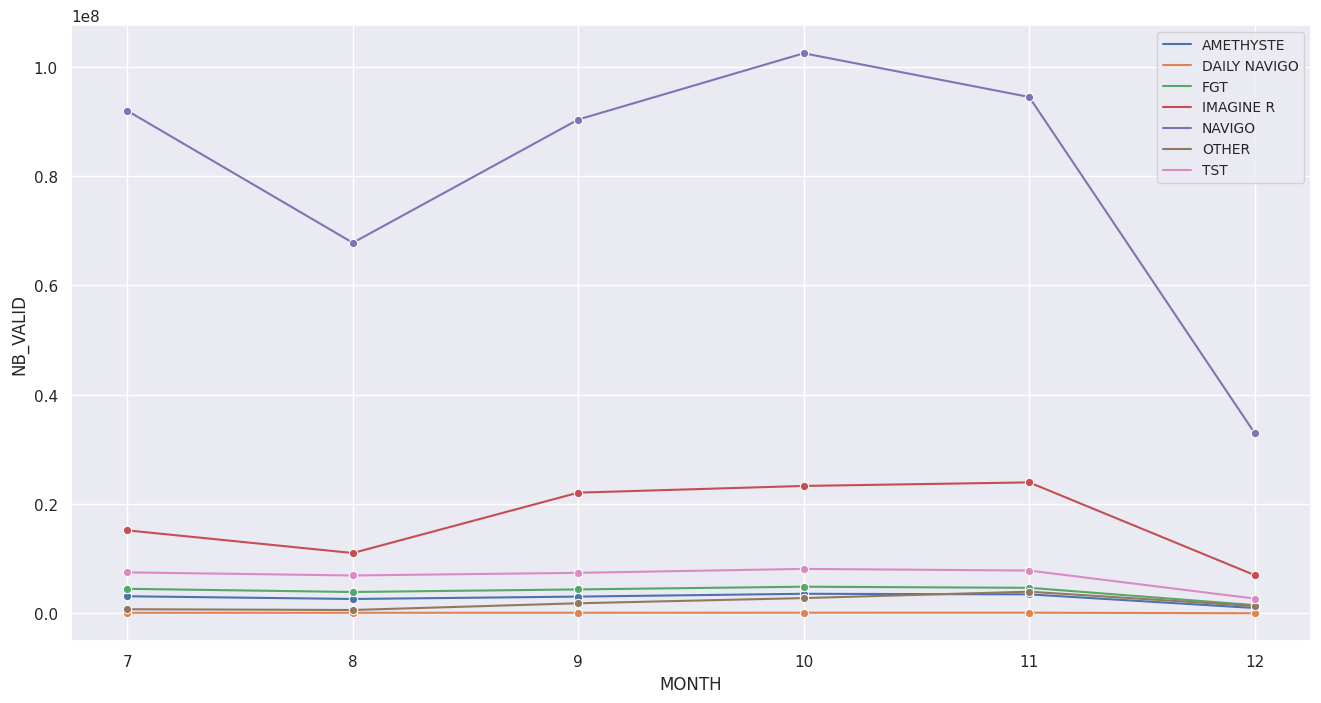

In [ ]:
sns.lineplot(x='MONTH',y='NB_VALID',data=df3,hue='TITLE_CATEGORY',marker='o')
sns.set(rc={'figure.figsize':(8,6)})
plt.legend(fontsize=10)
plt.show()

Navigo Annuel (Annual Navigo):

The Navigo Annuel is an annual subscription card for unlimited travel on public transportation within the Île-de-France region.
It is typically valid for one year from the date of purchase or activation

Navigo Mois (Navigo Month):

The Navigo Mois is a monthly subscription card for unlimited travel on public transportation within the Île-de-France region.
It is typically valid for one calendar month from the date of purchase or activation.

Navigo Semaine (Navigo Week):

The Navigo Semaine is a weekly subscription card for unlimited travel within the Île-de-France region.
It is valid for one week from the date of purchase or activation.

With the Navigo Passes, users can travel on buses, trams, the Paris Métro, the RER (Réseau Express Régional), and commuter trains within the defined zones on the card.

As Navigo passes are valid on multi mode transport we see that users are preferring more Navigo Passes

Lets visualize what is Total valid ticket  for 10 stations which are having max ticket sales

In [ ]:
df4=df.groupby('STATION_NAME').agg({'NB_VALID':'sum'}).reset_index()
df4=df4.sort_values('NB_VALID',ascending=False)[0:10]
df4

,STATION_NAME,NB_VALID
570,SAINT-LAZARE,32477706
236,GARE DE L'EST,14853277
238,GARE DU NORD,14651907
419,MONTPARNASSE,13675349
294,LA DEFENSE-GRANDE ARCHE,12305235
237,GARE DE LYON,7762235
333,LES HALLES,5833957
47,BIBLIOTHEQUE FRANCOIS MITTERRAND,5748073
535,REPUBLIQUE,5549293
123,CHATELET-LES HALLES,5272259




*   Saint-Lazare is one of the major railway stations in Paris and serves as a hub for both regional and suburban rail lines. It's also connected to several metro lines, making it a key transportation hub in the city. The high number of ticket sales at Saint-Lazare is likely due to its central location and the large number of commuters and travelers passing through it each day

*   Gare de l'Est primarily serves the eastern suburbs of Paris and is a key station for travelers heading to destinations in eastern France, Germany, and beyond. It's known for its historic architecture and plays a significant role in the city's rail network.


*   Gare du Nord is not only one of the busiest railway stations in Paris but also one of the busiest in Europe. It serves as a major hub for both domestic and international train services, including Eurostar trains to London and Thalys trains to various European cities. It's a central transportation point for travelers coming to or departing from Paris.





In [ ]:
# Lets check for comparison of weekend and weekday sales

In [ ]:
def weekend_or_not(x):
  if x=='Saturday' or x=='Sunday':
    return 1
  else:
      return 0

In [ ]:
df['IS_WEEKEND']=df['DAY'].apply(weekend_or_not)

In [ ]:
df['IS_WEEKEND'].value_counts()

0    646982
1    236976
Name: IS_WEEKEND, dtype: int64

In [ ]:
df5=df.loc[(df['STATION_NAME']=='SAINT-LAZARE') & (df['TITLE_CATEGORY']=='NAVIGO')]
df6=df.loc[(df['STATION_NAME']=='SAINT-LAZARE') & (df['TITLE_CATEGORY']=='IMAGINE R')]
df7=df.loc[(df['STATION_NAME']=='SAINT-LAZARE') & (df['TITLE_CATEGORY']=='TST')]
df8=df.loc[(df['STATION_NAME']=='SAINT-LAZARE') & (df['TITLE_CATEGORY']=='FGT')]
df9=df.loc[(df['STATION_NAME']=='SAINT-LAZARE') & (df['TITLE_CATEGORY']=='OTHER')]
df10=df.loc[(df['STATION_NAME']=='SAINT-LAZARE') & (df['TITLE_CATEGORY']=='AMETHYSTE')]
df11=df.loc[(df['STATION_NAME']=='SAINT-LAZARE') & (df['TITLE_CATEGORY']=='DAILY NAVIGO')]

In [ ]:
df5.sort_values('DATE')

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID,MONTH,DAY,IS_WEEKEND
806928,2019-07-01,SAINT-LAZARE,71370.0,NAVIGO,65,7,Monday,0
760732,2019-07-01,SAINT-LAZARE,71370.0,NAVIGO,8165,7,Monday,0
806455,2019-07-01,SAINT-LAZARE,71370.0,NAVIGO,720,7,Monday,0
617431,2019-07-01,SAINT-LAZARE,71370.0,NAVIGO,92397,7,Monday,0
775734,2019-07-02,SAINT-LAZARE,71370.0,NAVIGO,805,7,Tuesday,0
...,...,...,...,...,...,...,...,...
759922,2019-12-30,SAINT-LAZARE,71370.0,NAVIGO,1813,12,Monday,0
611813,2019-12-31,SAINT-LAZARE,71370.0,NAVIGO,236,12,Tuesday,0
697960,2019-12-31,SAINT-LAZARE,71370.0,NAVIGO,32751,12,Tuesday,0
697954,2019-12-31,SAINT-LAZARE,71370.0,NAVIGO,951,12,Tuesday,0


In [ ]:
df6.sort_values('DATE')

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID,MONTH,DAY,IS_WEEKEND
617429,2019-07-01,SAINT-LAZARE,71370.0,IMAGINE R,16342,7,Monday,0
770028,2019-07-01,SAINT-LAZARE,71370.0,IMAGINE R,1880,7,Monday,0
766266,2019-07-02,SAINT-LAZARE,71370.0,IMAGINE R,1951,7,Tuesday,0
775737,2019-07-02,SAINT-LAZARE,71370.0,IMAGINE R,16070,7,Tuesday,0
794938,2019-07-03,SAINT-LAZARE,71370.0,IMAGINE R,15743,7,Wednesday,0
...,...,...,...,...,...,...,...,...
849595,2019-12-29,SAINT-LAZARE,71370.0,IMAGINE R,8,12,Sunday,1
662569,2019-12-30,SAINT-LAZARE,71370.0,IMAGINE R,8694,12,Monday,0
638607,2019-12-30,SAINT-LAZARE,71370.0,IMAGINE R,205,12,Monday,0
697958,2019-12-31,SAINT-LAZARE,71370.0,IMAGINE R,4230,12,Tuesday,0


In [ ]:
df5_sum=df5.groupby(['DATE','STATION_NAME','IS_WEEKEND']).agg({'NB_VALID':'sum'}).reset_index()
df6_sum=df6.groupby(['DATE','STATION_NAME','IS_WEEKEND']).agg({'NB_VALID':'sum'}).reset_index()
df7_sum=df7.groupby(['DATE','STATION_NAME','IS_WEEKEND']).agg({'NB_VALID':'sum'}).reset_index()
df8_sum=df8.groupby(['DATE','STATION_NAME','IS_WEEKEND']).agg({'NB_VALID':'sum'}).reset_index()
df9_sum=df9.groupby(['DATE','STATION_NAME','IS_WEEKEND']).agg({'NB_VALID':'sum'}).reset_index()
df10_sum=df10.groupby(['DATE','STATION_NAME','IS_WEEKEND']).agg({'NB_VALID':'sum'}).reset_index()
df11_sum=df11.groupby(['DATE','STATION_NAME','IS_WEEKEND']).agg({'NB_VALID':'sum'}).reset_index()

In [ ]:
df5_sum.sort_values('NB_VALID')

,DATE,STATION_NAME,IS_WEEKEND,NB_VALID
181,2019-12-29,SAINT-LAZARE,1,11339
177,2019-12-25,SAINT-LAZARE,0,22736
174,2019-12-22,SAINT-LAZARE,1,25525
160,2019-12-08,SAINT-LAZARE,1,27196
6,2019-07-07,SAINT-LAZARE,1,28728
...,...,...,...,...
148,2019-11-26,SAINT-LAZARE,0,230167
151,2019-11-29,SAINT-LAZARE,0,230411
155,2019-12-03,SAINT-LAZARE,0,230656
141,2019-11-19,SAINT-LAZARE,0,230884


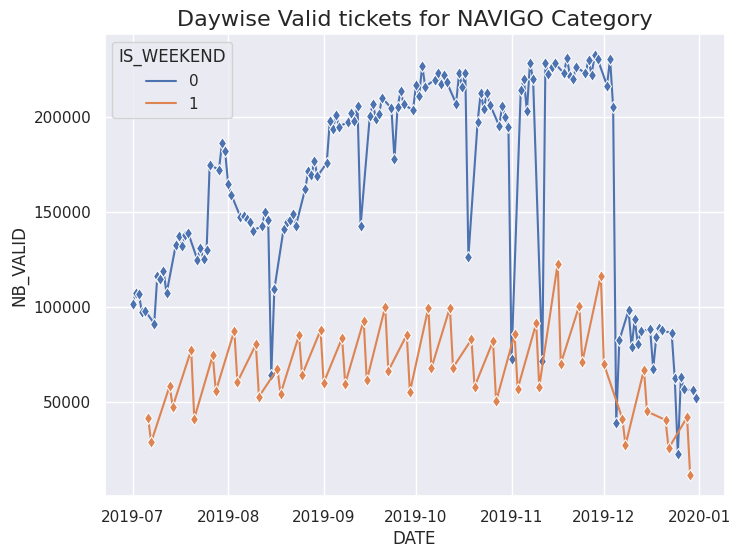

In [ ]:
sns.lineplot(x='DATE',y='NB_VALID',data=df5_sum,hue='IS_WEEKEND',color='indigo',marker='d')
plt.title('Daywise Valid tickets for NAVIGO Category',fontsize=16)
sns.set(rc={'figure.figsize':(7,5)})

From the graph we observe huge dips on certain date and we can see that values are below 1 lakh tickets let us write a code and find out which are these Dates and on Weekdays.

In [ ]:
df_holiday=df5_sum.loc[(df5_sum['NB_VALID']<=100000) & (df5_sum['IS_WEEKEND']==0)]

In [ ]:
df_holiday['DATE'].values

array(['2019-07-04T00:00:00.000000000', '2019-07-05T00:00:00.000000000',
       '2019-07-08T00:00:00.000000000', '2019-08-15T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-12-05T00:00:00.000000000', '2019-12-06T00:00:00.000000000',
       '2019-12-09T00:00:00.000000000', '2019-12-10T00:00:00.000000000',
       '2019-12-11T00:00:00.000000000', '2019-12-12T00:00:00.000000000',
       '2019-12-13T00:00:00.000000000', '2019-12-16T00:00:00.000000000',
       '2019-12-17T00:00:00.000000000', '2019-12-18T00:00:00.000000000',
       '2019-12-19T00:00:00.000000000', '2019-12-20T00:00:00.000000000',
       '2019-12-23T00:00:00.000000000', '2019-12-24T00:00:00.000000000',
       '2019-12-25T00:00:00.000000000', '2019-12-26T00:00:00.000000000',
       '2019-12-27T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')



*   15th August is celebrated as Ascension Day in France a Public holiday so less no of tickets

*   1st November is celebrated as All Saints Day in France a Public holiday so less no of tickets


*   11 th November is celebrated as Armistice Day in France a Public holiday so less no of tickets.

*   On December 6th, some regions of France, particularly in the northeast, celebrate Saint Nicholas Day with parades and processions.



*   In France, schools have a two-week winter holiday, known as the "Christmas holidays," which typically begins around December 20th and ends in early January. This means that many families take vacations during this time.








*   In the mountainous regions, such as the French Alps and the Pyrenees, December is a popular time for winter sports like skiing and snowboarding


*   So, December is a holiday month in France with a strong focus on Christmas and New Year celebrations, and it's a time of joy, festivities, and family gatherings. The specific traditions and celebrations may vary in different regions of the country








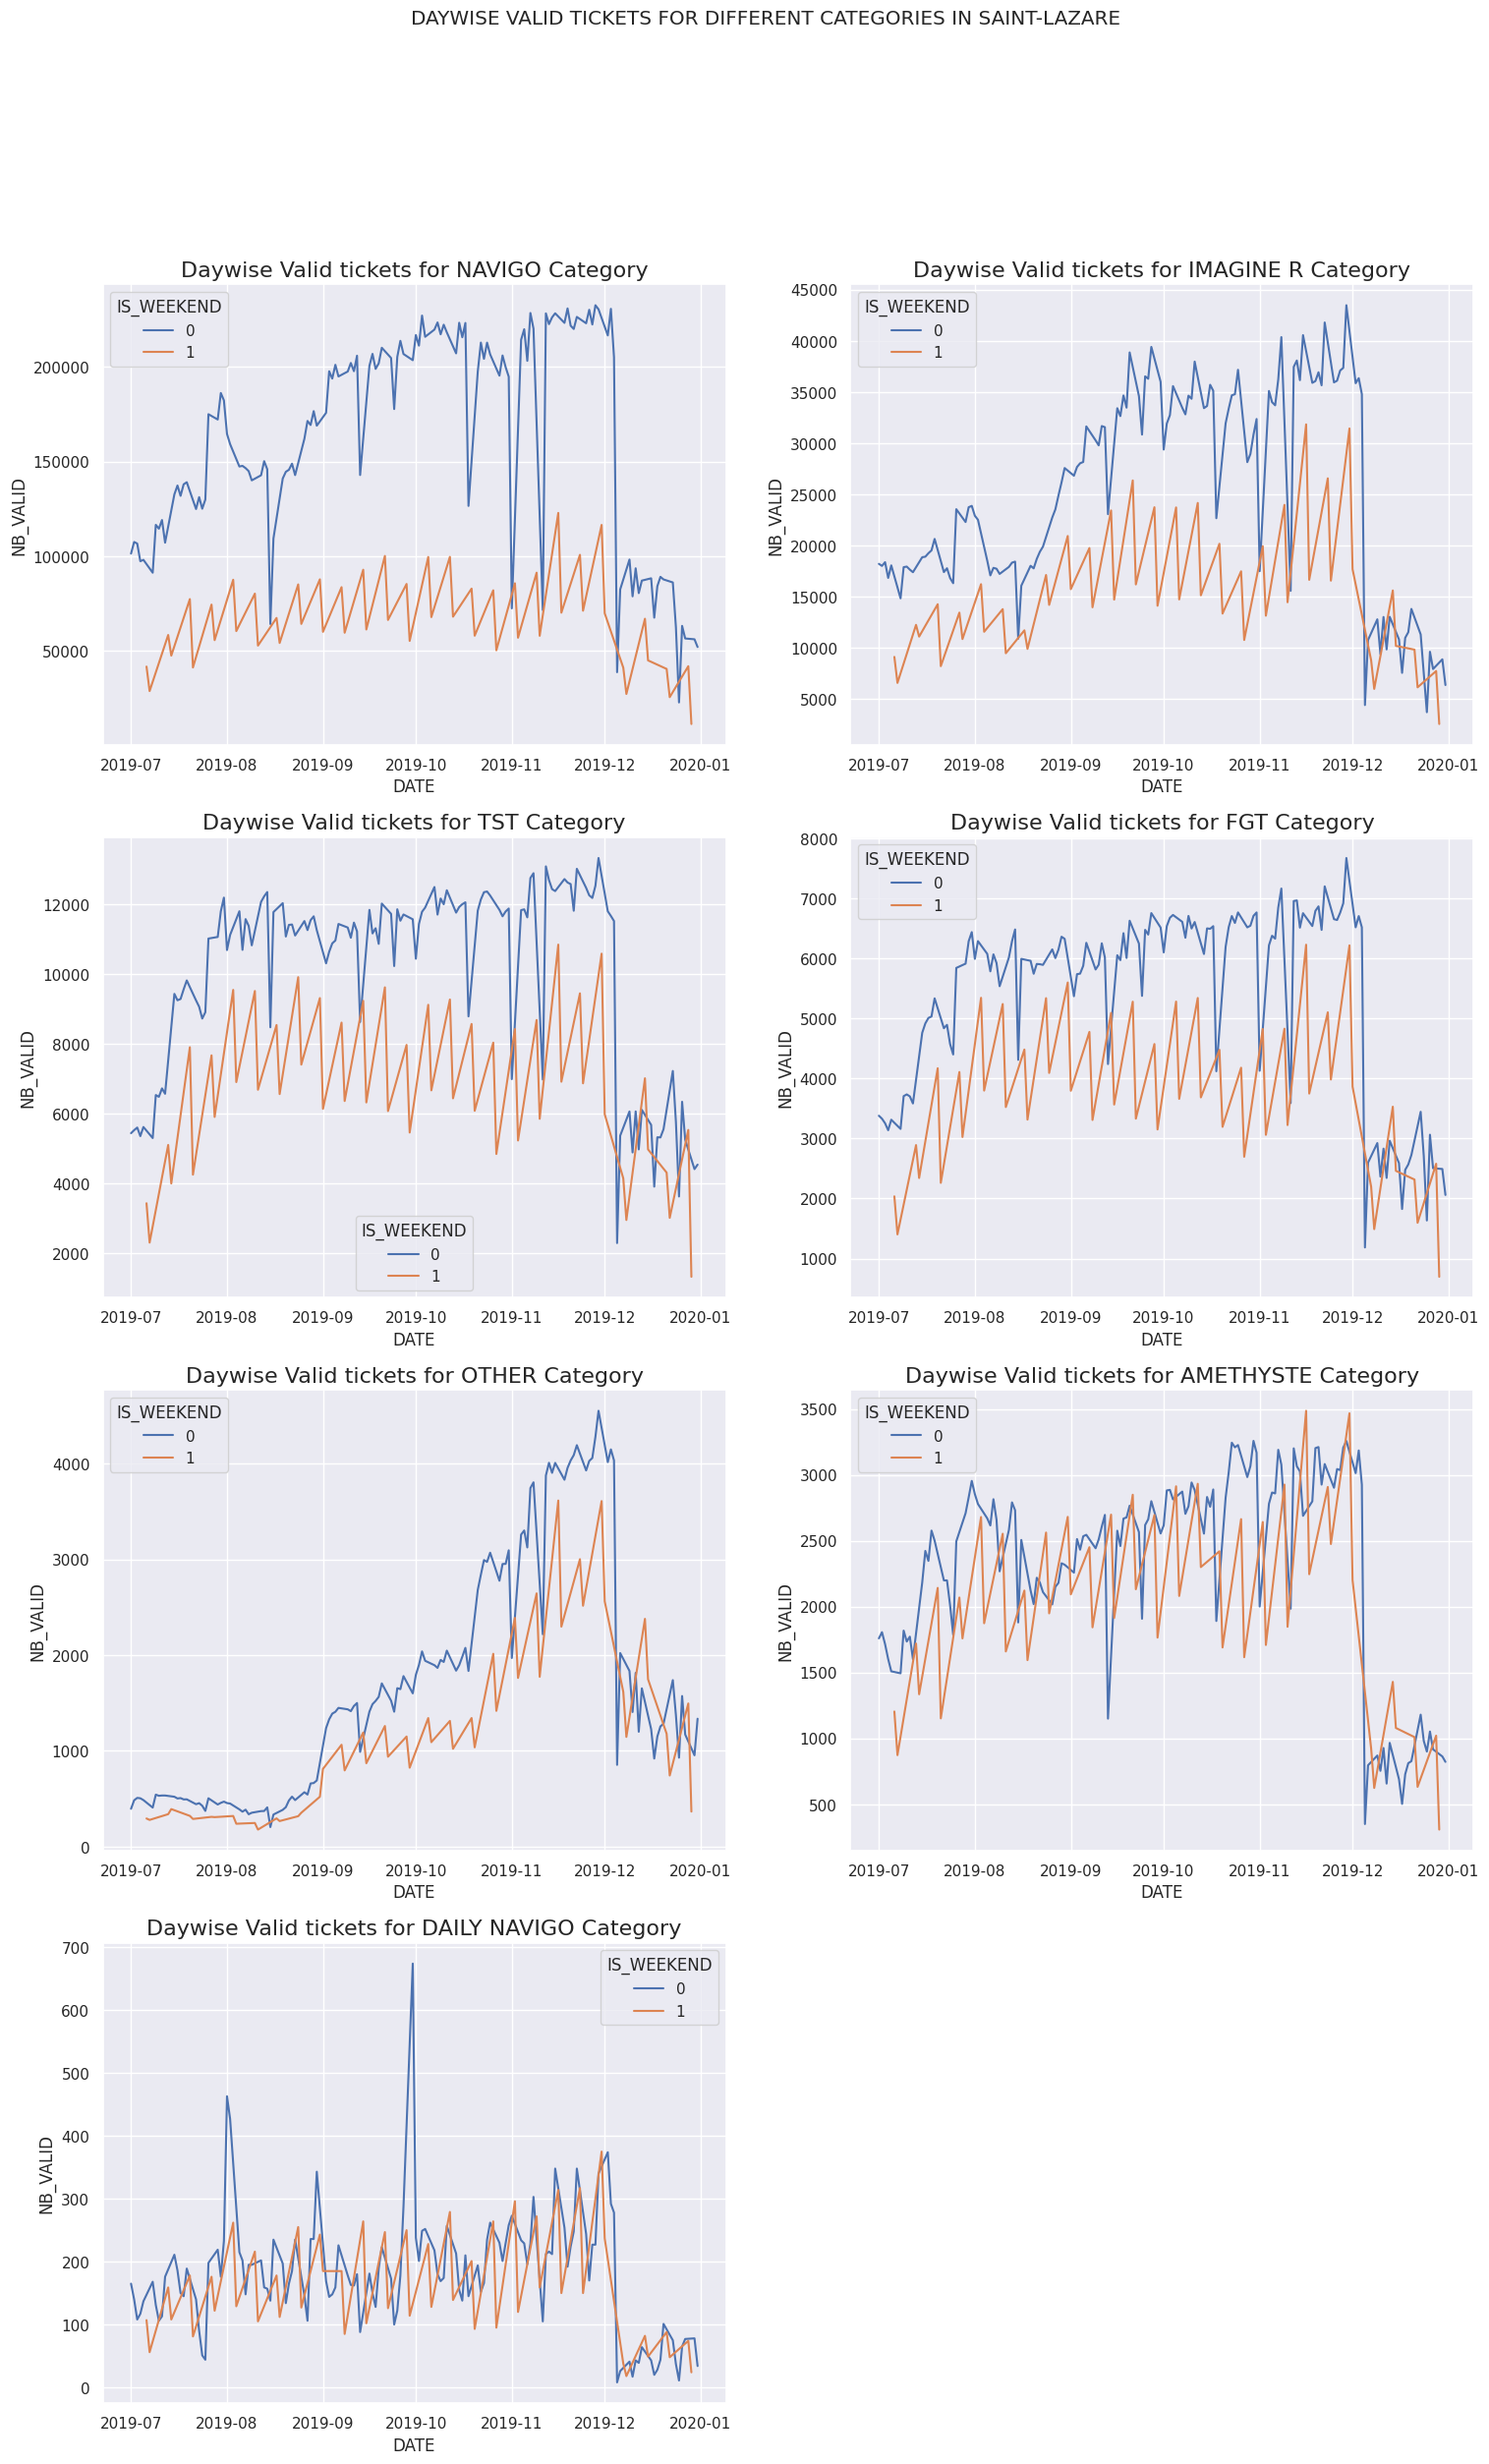

In [ ]:
fig=plt.figure(figsize=(18,28))
plt.subplot(4,2,1)
sns.lineplot(x='DATE',y='NB_VALID',data=df5_sum,color='indigo',hue='IS_WEEKEND')
plt.title('Daywise Valid tickets for NAVIGO Category',fontsize=16)

plt.subplot(4,2,2)
sns.lineplot(x='DATE',y='NB_VALID',data=df6_sum,color='red',hue='IS_WEEKEND')
plt.title('Daywise Valid tickets for IMAGINE R Category',fontsize=16)

plt.subplot(4,2,3)
sns.lineplot(x='DATE',y='NB_VALID',data=df7_sum,color='green',hue='IS_WEEKEND')
plt.title('Daywise Valid tickets for TST Category',fontsize=16)

plt.subplot(4,2,4)
sns.lineplot(x='DATE',y='NB_VALID',data=df8_sum,color='orange',hue='IS_WEEKEND')
plt.title('Daywise Valid tickets for FGT Category',fontsize=16)

plt.subplot(4,2,5)
sns.lineplot(x='DATE',y='NB_VALID',data=df9_sum,color='black',hue='IS_WEEKEND')
plt.title('Daywise Valid tickets for OTHER Category',fontsize=16)

plt.subplot(4,2,6)
sns.lineplot(x='DATE',y='NB_VALID',data=df10_sum,color='violet',hue='IS_WEEKEND')
plt.title('Daywise Valid tickets for AMETHYSTE Category',fontsize=16)

plt.subplot(4,2,7)
sns.lineplot(x='DATE',y='NB_VALID',data=df11_sum,color='brown',hue='IS_WEEKEND')
plt.title('Daywise Valid tickets for DAILY NAVIGO Category',fontsize=16)
plt.suptitle('DAYWISE VALID TICKETS FOR DIFFERENT CATEGORIES IN SAINT-LAZARE')
plt.show()




From the subplolts there is significant difference in daywise Valid tickets on Weekends and Weekdays in Saint-Lazare station.

In [ ]:
df_date=df.groupby(['DATE','IS_WEEKEND']).agg({'NB_VALID':'sum'}).reset_index()
df_date

,DATE,IS_WEEKEND,NB_VALID
0,2019-07-01,0,4637630
1,2019-07-02,0,5088713
2,2019-07-03,0,5086729
3,2019-07-04,0,5095661
4,2019-07-05,0,5065248
...,...,...,...
179,2019-12-27,0,979572
180,2019-12-28,1,671291
181,2019-12-29,1,382137
182,2019-12-30,0,1034015


In [ ]:
# Datewise Ticket sold :Weekend:0, Weekday:1

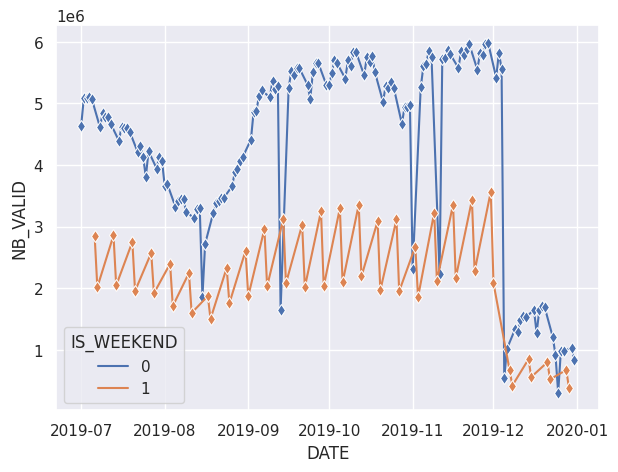

In [ ]:
sns.lineplot(data=df_date,x='DATE',y='NB_VALID',hue='IS_WEEKEND',marker='d')
sns.set(rc={"figure.figsize": (10, 8)})
plt.show()

In [ ]:
df_holiday=df_date.loc[(df_date['NB_VALID']<3000000) & (df_date['DATE']<'2019-12-12')
                       & (df_date['IS_WEEKEND']==0)]
df_holiday['DATE']

45    2019-08-15
46    2019-08-16
74    2019-09-13
123   2019-11-01
133   2019-11-11
157   2019-12-05
158   2019-12-06
161   2019-12-09
162   2019-12-10
163   2019-12-11
Name: DATE, dtype: datetime64[ns]

In [ ]:
# Pie Chart for saint lazare

In [ ]:
df12=df.loc[df['STATION_NAME']=='SAINT-LAZARE']

In [ ]:
df13=df12.groupby('TITLE_CATEGORY').agg({'NB_VALID':'sum'}).reset_index()
df13

,TITLE_CATEGORY,NB_VALID
0,AMETHYSTE,409098
1,DAILY NAVIGO,32096
2,FGT,905671
3,IMAGINE R,4129861
4,NAVIGO,25038790
5,OTHER,282592
6,TST,1679598


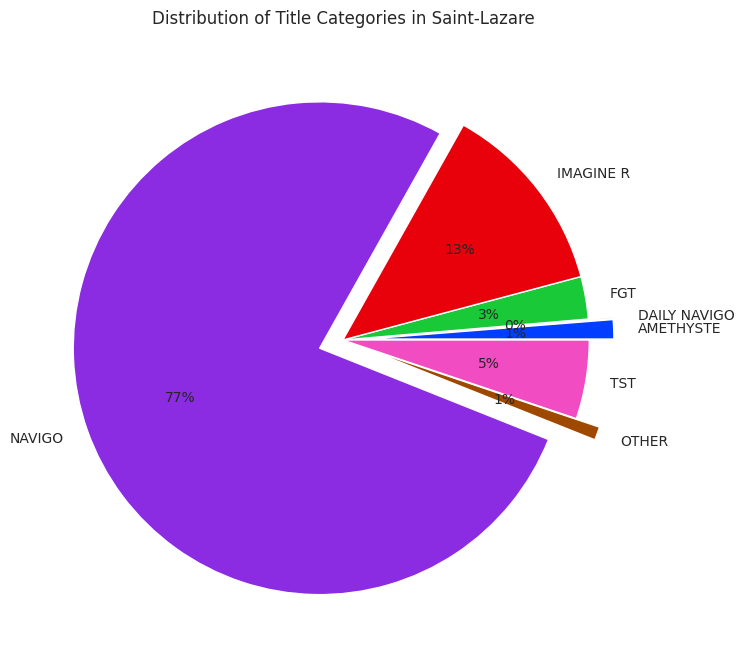

<Figure size 600x200 with 0 Axes>

In [ ]:
data=df13['NB_VALID']
keys=df13['TITLE_CATEGORY']
palette_color = sns.color_palette('bright')
explode=[0.1,0.1,0,0,0.1,0.1,0]
plt.title('Distribution of Title Categories in Saint-Lazare',loc='center')
plt.pie(data, labels=keys,colors=palette_color,autopct='%.0f%%',textprops={'fontsize':10},explode=explode)
plt.figure(figsize=(6,2))
plt.show()

From the pie chart its clearly visible that NAVIGO passes are most held by Commuters followed by IMAGINER,TST AND FGT in Saint-Lazare station

In [ ]:
df4['STATION_NAME'].values

array(['SAINT-LAZARE', "GARE DE L'EST", 'GARE DU NORD', 'MONTPARNASSE',
       'LA DEFENSE-GRANDE ARCHE', 'GARE DE LYON', 'LES HALLES',
       'BIBLIOTHEQUE FRANCOIS MITTERRAND', 'REPUBLIQUE',
       'CHATELET-LES HALLES'], dtype=object)

In [ ]:
df_top10_stations_navigo=df.loc[(df['STATION_NAME'].isin(df4['STATION_NAME'])) & (df['TITLE_CATEGORY']=='NAVIGO')]

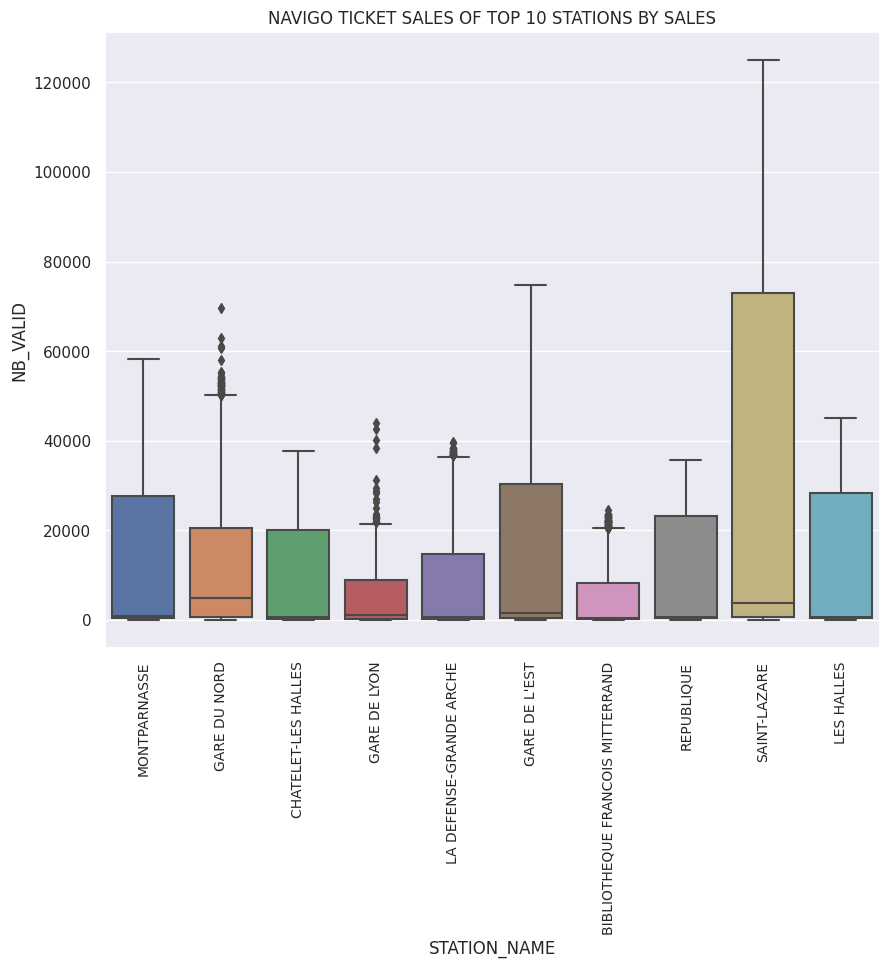

In [ ]:
sns.boxplot(x='STATION_NAME',y='NB_VALID',data=df_top10_stations_navigo)
plt.xticks(rotation=90,fontsize=10)
plt.title('NAVIGO TICKET SALES OF TOP 10 STATIONS BY SALES')
plt.show()

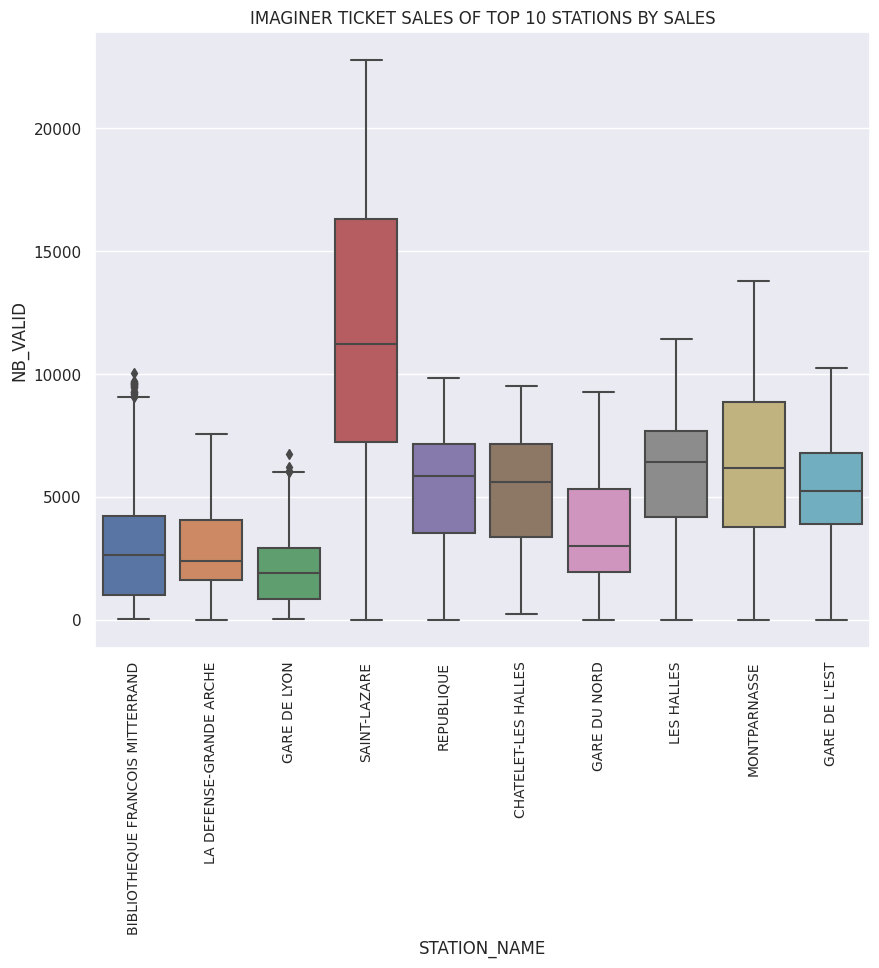

In [ ]:
df_top10_stations_imaginer=df.loc[(df['STATION_NAME'].isin(df4['STATION_NAME'])) & (df['TITLE_CATEGORY']=='IMAGINE R')]
sns.boxplot(x='STATION_NAME',y='NB_VALID',data=df_top10_stations_imaginer)
plt.xticks(rotation=90,fontsize=10)
plt.title('IMAGINER TICKET SALES OF TOP 10 STATIONS BY SALES')
plt.show()

In [ ]:
df15=df.groupby('STATION_NAME').agg({'NB_VALID':'sum'}).reset_index()
df15=df15.sort_values('NB_VALID')[0:10]
df15

,STATION_NAME,NB_VALID
383,MAREIL-MARLY,45
440,NOISY-LE-ROI,48
567,SAINT-GERMAIN-GRANDE-CEINTURE,48
565,SAINT-GERMAIN-BEL-AIR-FOURQUEUX,72
536,REPUBLIQUE-MARX DORMOY,1347
368,MAIRIE-DE-CLICHY,1442
14,ARBORETUM,1471
443,NOTRE-DAME-DES-ANGES,1516
256,GUILLERVAL,1704
139,CLICHY-MONTFERMEIL,2245


Stations like MAREIL-MARLY,NOISY-LE-ROI,SAINT-GERMAIN-GRANDE-CEINTURE,SAINT-GERMAIN-BEL-AIR-FOURQUEUX saw lowest no of valid tickets.

 Mareil-Marly is a small commune located in the Yvelines department. The train station in Mareil-Marly likely serves as a stop on a commuter rail line, connecting residents to other suburban areas and possibly the city center of Paris. Stations in smaller communities like Mareil-Marly tend to have lower traffic due to their size and population.



In [ ]:
df_bottom10_stations=df.loc[(df['STATION_NAME'].isin(df15['STATION_NAME'])) & (df['TITLE_CATEGORY']=='NAVIGO')]

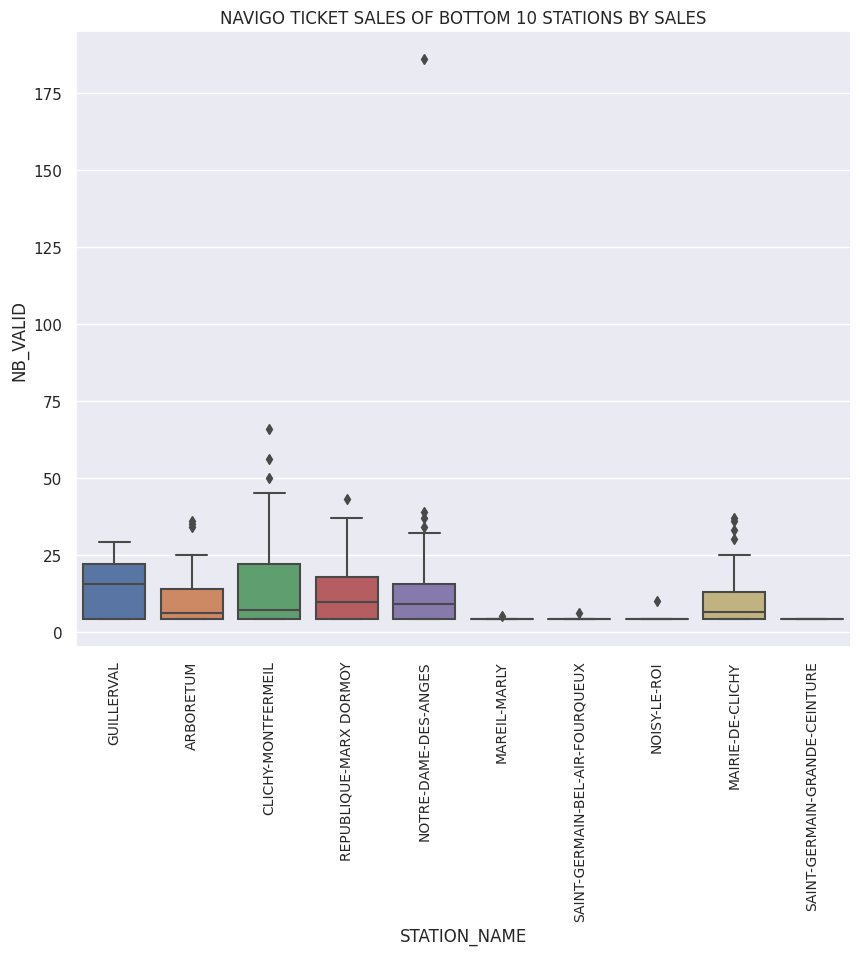

In [ ]:
sns.boxplot(x='STATION_NAME',y='NB_VALID',data=df_bottom10_stations)
plt.xticks(rotation=90,fontsize=10)
plt.title('NAVIGO TICKET SALES OF BOTTOM 10 STATIONS BY SALES')
plt.show()

In [ ]:
df_14=df.groupby(['TITLE_CATEGORY','IS_WEEKEND']).agg({'NB_VALID':'sum'}).sort_values(['TITLE_CATEGORY','NB_VALID'],ascending=[True,False]).reset_index()
df_14

,TITLE_CATEGORY,IS_WEEKEND,NB_VALID
0,AMETHYSTE,0,13157471
1,AMETHYSTE,1,3838946
2,DAILY NAVIGO,0,513696
3,DAILY NAVIGO,1,199796
4,FGT,0,18906042
5,FGT,1,5062013
6,IMAGINE R,0,84476034
7,IMAGINE R,1,18186757
8,NAVIGO,0,406472357
9,NAVIGO,1,73428013


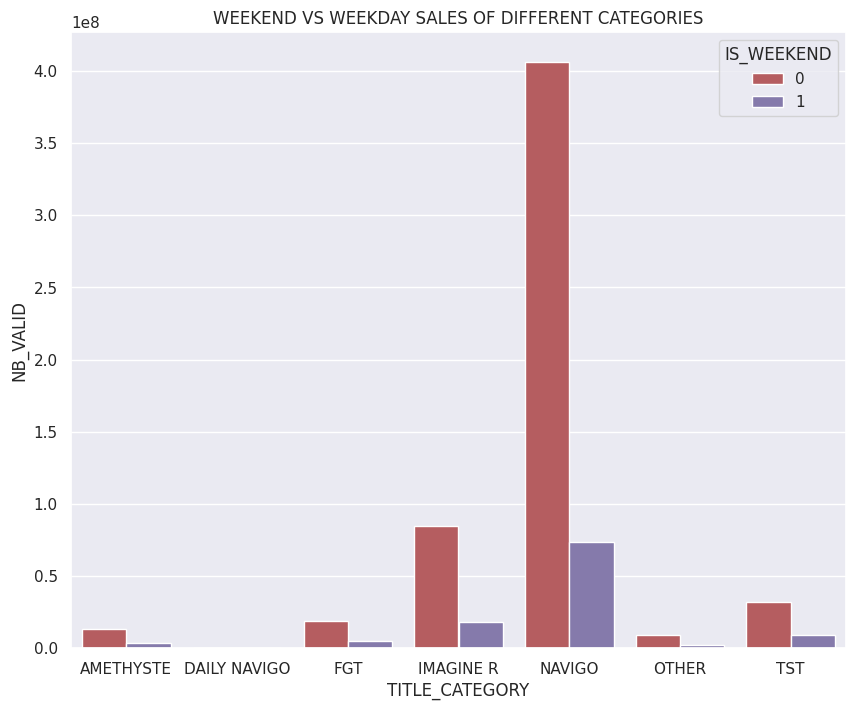

In [ ]:
sns.barplot(x='TITLE_CATEGORY',y='NB_VALID',hue='IS_WEEKEND',data=df_14,palette=['C3','C4'])
sns.set_style('darkgrid')
plt.title('WEEKEND VS WEEKDAY SALES OF DIFFERENT CATEGORIES')
plt.show()

All the TITLE_CATEGORY have Weekday valid tickets more than Weekend sales but we need more clarity lets visualize valid tickets daywise

In [ ]:
# Lets see how each day have sales

In [ ]:
df_day=df.groupby(['DAY','TITLE_CATEGORY']).agg({'NB_VALID':'sum'}).sort_values('NB_VALID',ascending=False).reset_index()
df_day

,DAY,TITLE_CATEGORY,NB_VALID
0,Tuesday,NAVIGO,85633064
1,Wednesday,NAVIGO,83942939
2,Thursday,NAVIGO,81304846
3,Monday,NAVIGO,79404280
4,Friday,NAVIGO,76187228
5,Saturday,NAVIGO,43969590
6,Sunday,NAVIGO,29458423
7,Wednesday,IMAGINE R,17655927
8,Tuesday,IMAGINE R,17088525
9,Friday,IMAGINE R,16713189


In [ ]:
# Daywise ticket sales

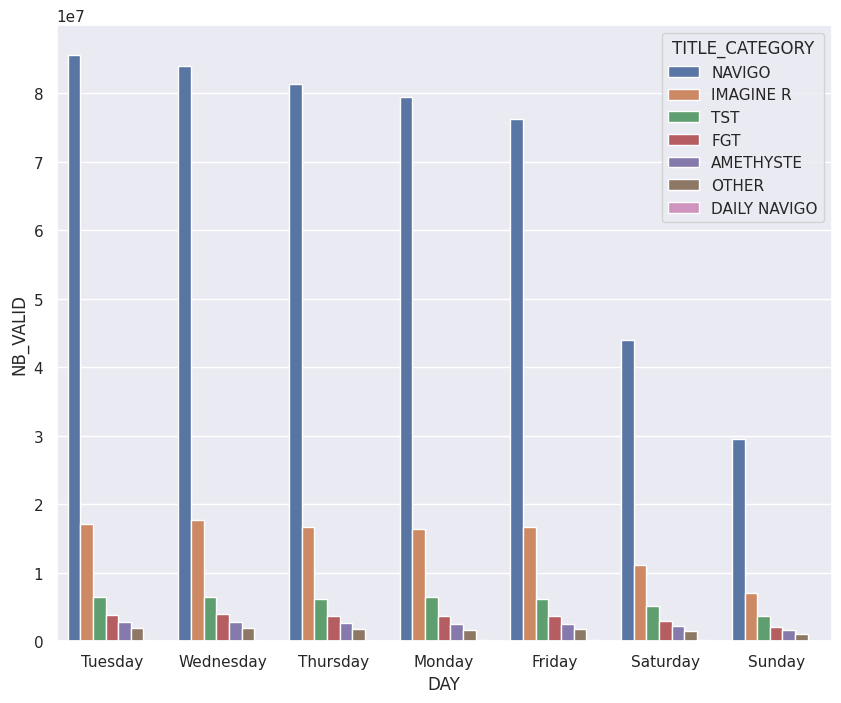

In [ ]:
sns.barplot(x='DAY',y='NB_VALID',hue='TITLE_CATEGORY',data=df_day)
sns.set(rc={'figure.figsize':(12,8)})


As observed on each day Navigo sales are highest followed by Imaginer,TST,FGT,Amethyste,Other and lastly Daily navigo.Also on Weekends ticket sales are low as compared to Weekday.People are preffering Navigo over Daily Navigo as monthly or annual passes have lesser price compared to one day.

In [ ]:
#Earlier we observed in dec the sales were lowest lets analyze for month of december.

In [ ]:
df_dec=df.loc[df['MONTH']==12]
df_dec

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID,MONTH,DAY,IS_WEEKEND
320757,2019-12-04,PERE LACHAISE,71787.0,OTHER,360,12,Wednesday,0
320760,2019-12-04,PERNETY,412687.0,NAVIGO,6305,12,Wednesday,0
320763,2019-12-04,PERNETY,412687.0,TST,400,12,Wednesday,0
320766,2019-12-04,PHILIPPE AUGUSTE,71751.0,NAVIGO,3595,12,Wednesday,0
320769,2019-12-04,PHILIPPE AUGUSTE,71751.0,TST,247,12,Wednesday,0
...,...,...,...,...,...,...,...,...
850365,2019-12-30,DENFERT-ROCHEREAU,71056.0,IMAGINE R,45,12,Monday,0
850366,2019-12-30,DUROC,71159.0,NAVIGO,5,12,Monday,0
850367,2019-12-30,ESPLANADE DE LA DEFENSE,71485.0,OTHER,90,12,Monday,0
850368,2019-12-30,EUROPE,73617.0,OTHER,4,12,Monday,0


In [ ]:
df_dec=df_dec.groupby(['DATE','IS_WEEKEND']).agg({'NB_VALID':'sum'}).reset_index()

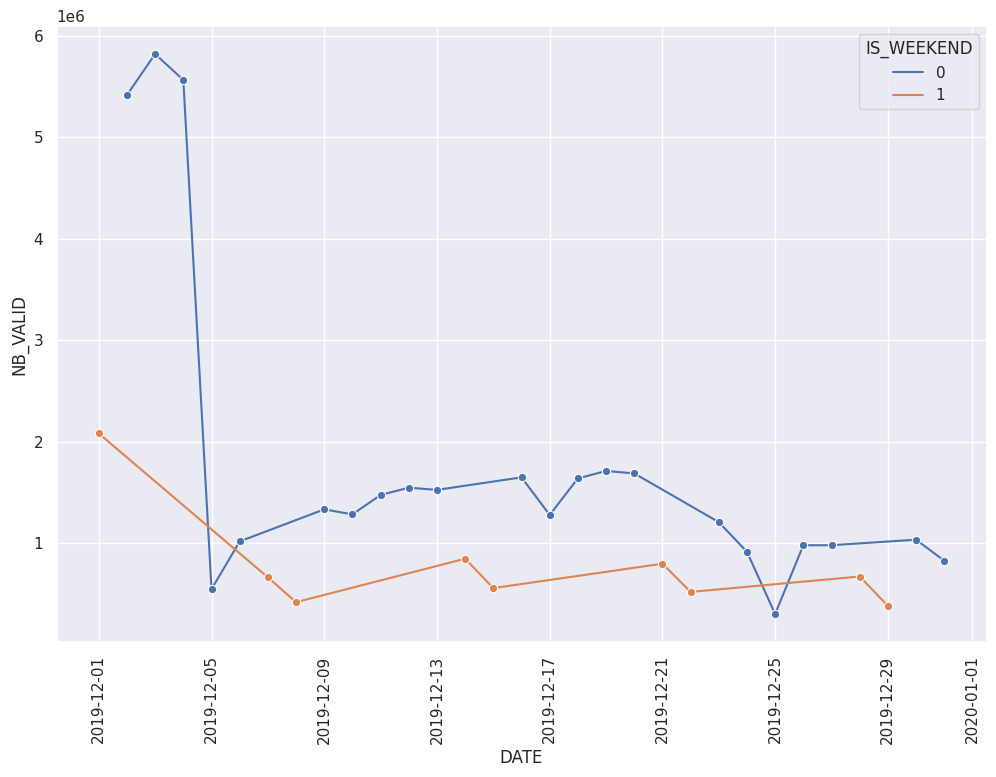

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [ ]:
sns.lineplot(x='DATE',y='NB_VALID',data=df_dec,marker='o',color='orange',hue='IS_WEEKEND')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(8,6))

We can observe a huge decline in ticket sales form 5th DEC 2019 to 31 st DEC 2019.As December is a holiday season and Christmas is also celebrated in same month its observed that commuters havent travelled much on this month they have preferred to stay indoors.

In [ ]:
df.head(10)

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID,MONTH,DAY,IS_WEEKEND
0,2019-07-21,LA TOUR MAUBOURG,71242.0,NAVIGO,1141,7,Sunday,1
1,2019-07-21,PARMENTIER,71801.0,OTHER,4,7,Sunday,1
2,2019-07-21,PARMENTIER,71801.0,TST,97,7,Sunday,1
3,2019-07-21,PEREIRE-LEVALLOIS,71453.0,FGT,53,7,Sunday,1
4,2019-07-21,PERNETY,412687.0,OTHER,36,7,Sunday,1
5,2019-07-21,PICPUS,71639.0,FGT,25,7,Sunday,1
6,2019-07-21,PIERRE CURIE,70537.0,IMAGINE R,264,7,Sunday,1
7,2019-07-21,PIGALLE,71409.0,DAILY NAVIGO,7,7,Sunday,1
8,2019-07-21,PLACE DES FETES,71885.0,NAVIGO,20,7,Sunday,1
9,2019-07-21,PLACE DES FETES,71885.0,AMETHYSTE,297,7,Sunday,1


Now lets apply a machine learning technique to these features and understand the pattern to forecast no of passengers per station per day.

In [ ]:
# We need to convert categorical columns to numerical columns for applying machine learning.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883958 entries, 0 to 883957
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            883958 non-null  datetime64[ns]
 1   STATION_NAME    883958 non-null  object        
 2   ID_REFA_LDA     882459 non-null  float64       
 3   TITLE_CATEGORY  883958 non-null  object        
 4   NB_VALID        883958 non-null  int64         
 5   MONTH           883958 non-null  int64         
 6   DAY             883958 non-null  object        
 7   IS_WEEKEND      883958 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 54.0+ MB


There are 2 Categorical columns:Station_name and Title_category we need to convert them to numerical features,Also we need to convert date to numerical

In [ ]:
df['DAY']=df['DATE'].dt.day
df['YEAR']=df['DATE'].dt.year

In [ ]:
df.head(10)

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID,MONTH,DAY,IS_WEEKEND,YEAR
0,2019-07-21,LA TOUR MAUBOURG,71242.0,NAVIGO,1141,7,21,1,2019
1,2019-07-21,PARMENTIER,71801.0,OTHER,4,7,21,1,2019
2,2019-07-21,PARMENTIER,71801.0,TST,97,7,21,1,2019
3,2019-07-21,PEREIRE-LEVALLOIS,71453.0,FGT,53,7,21,1,2019
4,2019-07-21,PERNETY,412687.0,OTHER,36,7,21,1,2019
5,2019-07-21,PICPUS,71639.0,FGT,25,7,21,1,2019
6,2019-07-21,PIERRE CURIE,70537.0,IMAGINE R,264,7,21,1,2019
7,2019-07-21,PIGALLE,71409.0,DAILY NAVIGO,7,7,21,1,2019
8,2019-07-21,PLACE DES FETES,71885.0,NAVIGO,20,7,21,1,2019
9,2019-07-21,PLACE DES FETES,71885.0,AMETHYSTE,297,7,21,1,2019


In [ ]:
# Lets convert STATION_NAME to Numerical value

In [ ]:
!pip install category_encoders
from category_encoders import TargetEncoder

In [ ]:
te=TargetEncoder()
df['STATION_NAME']=te.fit_transform(df['STATION_NAME'],df['NB_VALID'])

In [ ]:
df['STATION_NAME'].value_counts()

1629.010493     4765
2593.852234     4744
1803.034191     3188
10245.333123    3170
4681.120447     3130
                ... 
11.583906        131
441.309562        17
529.141056        12
545.131467        11
560.625404        10
Name: STATION_NAME, Length: 686, dtype: int64

In [ ]:
df.groupby('STATION_NAME').agg({'NB_VALID':'mean'}).sort_values('NB_VALID',ascending=False).reset_index()

,STATION_NAME,NB_VALID
0,10245.333123,10245.333123
1,4934.643522,4934.643522
2,4681.120447,4681.120447
3,4598.301614,4598.301614
4,4015.111493,4015.111493
...,...,...
681,6.365782,6.365782
682,560.625404,4.800000
683,441.309562,4.235294
684,545.131467,4.090909


In [ ]:
te=TargetEncoder()
df['TITLE_CATEGORY']=te.fit_transform(df['TITLE_CATEGORY'],df['NB_VALID'])


In [ ]:
df.head()

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID,MONTH,DAY,IS_WEEKEND,YEAR
0,2019-07-21,458.267684,71242.0,2163.145732,1141,7,21,1,2019
1,2019-07-21,737.670463,71801.0,88.144545,4,7,21,1,2019
2,2019-07-21,737.670463,71801.0,360.246593,97,7,21,1,2019
3,2019-07-21,526.517510,71453.0,212.384849,53,7,21,1,2019
4,2019-07-21,762.891679,412687.0,88.144545,36,7,21,1,2019


In [ ]:
df_new=df.head(100000)
df_new

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID,MONTH,DAY,IS_WEEKEND,YEAR
0,2019-07-21,LA TOUR MAUBOURG,71242.0,NAVIGO,1141,7,21,1,2019
1,2019-07-21,PARMENTIER,71801.0,OTHER,4,7,21,1,2019
2,2019-07-21,PARMENTIER,71801.0,TST,97,7,21,1,2019
3,2019-07-21,PEREIRE-LEVALLOIS,71453.0,FGT,53,7,21,1,2019
4,2019-07-21,PERNETY,412687.0,OTHER,36,7,21,1,2019
...,...,...,...,...,...,...,...,...,...
99995,2019-09-28,CONFLANS-FIN-D'OISE,73605.0,TST,306,9,28,1,2019
99996,2019-10-22,EXELMANS,71124.0,IMAGINE R,1600,10,22,0,2019
99997,2019-09-28,CHAVILLE-VELIZY,69487.0,FGT,22,9,28,1,2019
99998,2019-08-13,LOUIS BLANC,71407.0,OTHER,41,8,13,0,2019


In [ ]:
te=TargetEncoder()
df_new['STATION_NAME']=te.fit_transform(df_new['STATION_NAME'],df_new['NB_VALID'])
df_new['STATION_NAME']

<ipython-input-406-a5453399dda4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['STATION_NAME']=te.fit_transform(df_new['STATION_NAME'],df_new['NB_VALID'])


0         533.288318
1         869.863304
2         869.863304
3         553.810345
4         843.637467
            ...     
99995     637.810693
99996     604.147362
99997     281.282853
99998     625.160781
99999    1863.834331
Name: STATION_NAME, Length: 100000, dtype: float64

In [ ]:
df_new['TITLE_CATEGORY']=te.fit_transform(df_new['TITLE_CATEGORY'],df_new['NB_VALID'])

<ipython-input-361-52520890f474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['TITLE_CATEGORY']=te.fit_transform(df_new['TITLE_CATEGORY'],df_new['NB_VALID'])


In [ ]:
df_new.head(10)

,DATE,STATION_NAME,ID_REFA_LDA,TITLE_CATEGORY,NB_VALID,MONTH,DAY,IS_WEEKEND,YEAR
0,2019-07-21,533.288318,71242.0,2286.051629,1141,7,21,1,2019
1,2019-07-21,869.863304,71801.0,87.220391,4,7,21,1,2019
2,2019-07-21,869.863304,71801.0,372.678323,97,7,21,1,2019
3,2019-07-21,553.810345,71453.0,226.905366,53,7,21,1,2019
4,2019-07-21,843.637467,412687.0,87.220391,36,7,21,1,2019
5,2019-07-21,266.588671,71639.0,226.905366,25,7,21,1,2019
6,2019-07-21,508.113534,70537.0,949.995268,264,7,21,1,2019
7,2019-07-21,1116.795038,71409.0,8.914701,7,7,21,1,2019
8,2019-07-21,704.961894,71885.0,2286.051629,20,7,21,1,2019
9,2019-07-21,704.961894,71885.0,163.605938,297,7,21,1,2019


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# Splitting the data into 80% train and 20% test

In [ ]:
y=df_new['NB_VALID']
X=df_new.drop(['NB_VALID','ID_REFA_LDA','DATE'],axis=1)

In [ ]:
X

,STATION_NAME,TITLE_CATEGORY,MONTH,DAY,IS_WEEKEND,YEAR
0,533.288318,2286.051629,7,21,1,2019
1,869.863304,87.220391,7,21,1,2019
2,869.863304,372.678323,7,21,1,2019
3,553.810345,226.905366,7,21,1,2019
4,843.637467,87.220391,7,21,1,2019
...,...,...,...,...,...,...
99995,637.810693,372.678323,9,28,1,2019
99996,604.147362,949.995268,10,22,0,2019
99997,281.282853,226.905366,9,28,1,2019
99998,625.160781,87.220391,8,13,0,2019


In [ ]:
y

0        1141
1           4
2          97
3          53
4          36
         ... 
99995     306
99996    1600
99997      22
99998      41
99999     303
Name: NB_VALID, Length: 100000, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((80000, 6), (20000, 6))

In [ ]:
X_train.head()

,STATION_NAME,TITLE_CATEGORY,MONTH,DAY,IS_WEEKEND,YEAR
75220,21.474715,163.605938,10,14,0,2019
48955,640.549293,2286.051629,9,19,0,2019
44966,1806.279553,87.220391,8,27,0,2019
13568,670.309406,226.905366,8,13,0,2019
92727,809.297752,2286.051629,10,19,1,2019


In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
model.coef_

array([ 996.88366798,  934.5215215 ,  111.27477402,   12.2212241 ,
       -190.91365733,    0.        ])

In [ ]:
y_hat=model.predict(X_test_scaled)
y_hat

array([1733.02883884, 2255.80619086, 3403.12298677, ...,  592.22105279,
       3456.36192345, -604.55519332])

In [ ]:
r2_score=model.score(X_test_scaled,y_test)
r2_score

0.2269251842056158

In [ ]:
adj_r2_score=1-((1-r2_score))*(len(y)-1)/(len(y)-X.shape[1]-1)
adj_r2_score

0.22687879646952658

Linear regression model score is coming out to be low lets evaluate using PolynomialRegression.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [ ]:
def adj_r2(X,y,r2_score):
  return 1-((1-r2_score)*(len(y)-1)/(len(y)-X.shape[1]-1))

In [ ]:
max_degree=7
train_scores=[]
test_scores=[]
Scaler=StandardScaler()


In [ ]:
for degree in range(1,max_degree):
    polyreg_scaled=make_pipeline(PolynomialFeatures(degree),Scaler,Ridge())
    polyreg_scaled.fit(X_train,y_train)
    train_score=adj_r2(X_train,y_train,polyreg_scaled.score(X_train,y_train))
    test_score=adj_r2(X_test,y_test,polyreg_scaled.score(X_test,y_test))
    train_scores.append(train_score)
    test_scores.append(test_score)


In [ ]:
len(train_scores)

6

In [ ]:
len(test_scores)

6

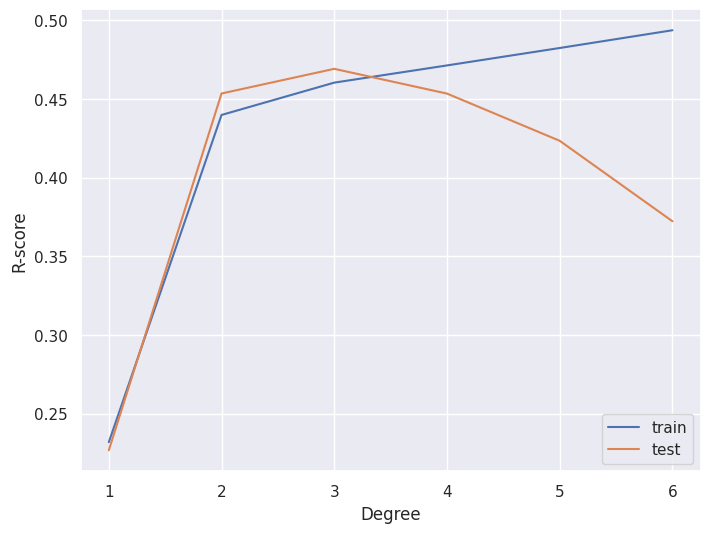

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1,7)),train_scores,label='train')
plt.plot(list(range(1,7)),test_scores,label='test')
plt.xlabel('Degree')
plt.ylabel('R-score')
plt.legend(loc='lower right')

In [ ]:
train_scores=[]
test_scores=[]
rate_list=[0.001,0.01,0.03,0.05,0.07,0.09,0.1]
for rate in rate_list:
    polyreg_scaled=make_pipeline(PolynomialFeatures(3),Scaler,Ridge(alpha=rate))
    polyreg_scaled.fit(X_train,y_train)
    train_score=adj_r2(X_train,y_train,polyreg_scaled.score(X_train,y_train))
    test_score=adj_r2(X_test,y_test,polyreg_scaled.score(X_test,y_test))
    train_scores.append(train_score)
    test_scores.append(test_score)
print(train_scores)
print(test_scores)


[0.46061054152311875, 0.4606097121005561, 0.46060441255011, 0.4605964097743669, 0.4605871866529694, 0.4605775437416858, 0.46057271014842016]
[0.4691864101772324, 0.4691775208710861, 0.4691587982400707, 0.4691420298031822, 0.4691274001037069, 0.46911483882695604, 0.46910928259344187]


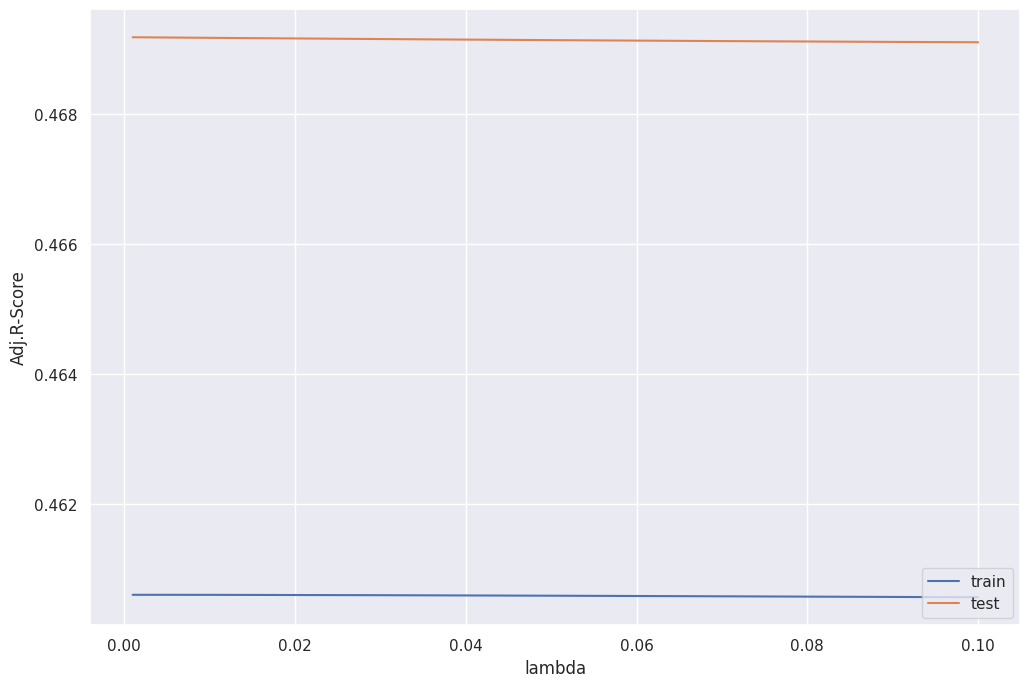

In [ ]:
plt.plot(rate_list,train_scores,label='train')
plt.plot(rate_list,test_scores,label='test')
plt.xlabel('lambda')
plt.ylabel('Adj.R-Score')
plt.legend(loc='lower right')
plt.show()

In [ ]:
polyreg_scaled=make_pipeline(PolynomialFeatures(3),Scaler,Ridge(alpha=0.001))
polyreg_scaled.fit(X_train,y_train)
train_score=adj_r2(X_train,y_train,polyreg_scaled.score(X_train,y_train))
test_score=adj_r2(X_test,y_test,polyreg_scaled.score(X_test,y_test))
print(train_score)
print(test_score)

0.46061054152311875
0.4691864101772324


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
regressor = RandomForestRegressor(n_estimators=100,random_state=42)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test).reshape(-1,1)
regressor.score(y_test,predictions)




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
np.array([1,2,3]).shape

In [ ]:
X_tr_cv,X_test,y_tr_cv,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_tr_cv,y_tr_cv,test_size=0.25,random_state=42)


In [ ]:
X_train.shape,X_val.shape,X_test.shape

((60000, 6), (20000, 6), (20000, 6))

In [ ]:
max_degree=7
train_scores=[]
test_scores=[]
val_scores=[]
Scaler=StandardScaler()
for degree in range(1,max_degree):
    polyreg_scaled=make_pipeline(PolynomialFeatures(degree),Scaler,Ridge())
    polyreg_scaled.fit(X_train,y_train)
    train_score=adj_r2(X_train,y_train,polyreg_scaled.score(X_train,y_train))
    val_score=adj_r2(X_val,y_val,polyreg_scaled.score(X_val,y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

In [ ]:
val_scores

[0.24134309880808358,
 0.4654172974633336,
 0.4674661765075889,
 0.4474295765349797,
 0.42414042781490324,
 0.3990781458606313]

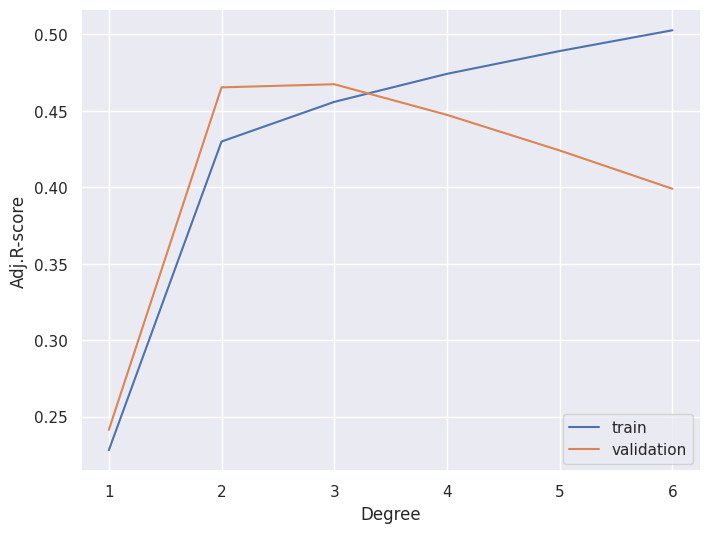

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(list(range(1,7)),train_scores,label='train')
plt.plot(list(range(1,7)),val_scores,label='validation')
plt.xlabel('Degree')
plt.ylabel('Adj.R-score')
plt.legend(loc='lower right')

In [ ]:
train_scores=[]
val_scores=[]
rate_list=[0.01,1,5,10,20]
for rate in rate_list:
    polyreg_scaled=make_pipeline(PolynomialFeatures(3),Scaler,Ridge(alpha=rate))
    polyreg_scaled.fit(X_train,y_train)
    train_score=adj_r2(X_train,y_train,polyreg_scaled.score(X_train,y_train))
    val_score=adj_r2(X_val,y_val,polyreg_scaled.score(X_val,y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)
print(train_scores)
print(val_scores)


[0.4562545878795857, 0.4559275595812079, 0.45553925055413425, 0.45533242958492626, 0.45506556885013405]
[0.46663460821043223, 0.4674661765075889, 0.4685677041809069, 0.46916761416172925, 0.46992285292657754]


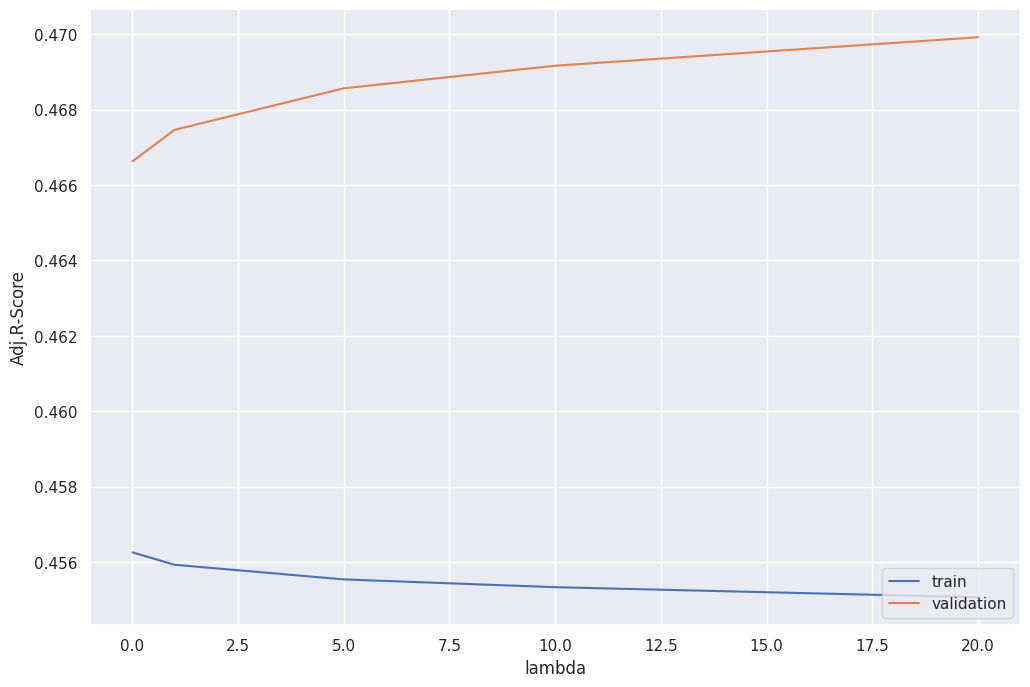

In [ ]:
plt.plot(rate_list,train_scores,label='train')
plt.plot(rate_list,val_scores,label='validation')
plt.xlabel('lambda')
plt.ylabel('Adj.R-Score')
plt.legend(loc='lower right')
plt.show()

In [ ]:
polyreg_scaled=make_pipeline(PolynomialFeatures(3),Scaler,Ridge(alpha=20))
polyreg_scaled.fit(X_train,y_train)
train_score=adj_r2(X_train,y_train,polyreg_scaled.score(X_train,y_train))
val_score=adj_r2(X_val,y_val,polyreg_scaled.score(X_val,y_val))
test_score=adj_r2(X_test,y_test,polyreg_scaled.score(X_test,y_test))

In [ ]:
test_score

0.4722767064765232

In [ ]:
val_score

0.46992285292657754

In [ ]:
train_score

0.45506556885013405

Now lets predict Valid tickets for a date using our polynomial model

In [ ]:
sample_data=pd.DataFrame({'STATION_NAME':['SAINT-LAZARE'],'TITLE_CATEGORY':['NAVIGO'],
                          'MONTH':[10],'DAY':[15],'IS_WEEKEND':[0],'YEAR':[2021]})
sample_data

,STATION_NAME,TITLE_CATEGORY,MONTH,DAY,IS_WEEKEND,YEAR
0,SAINT-LAZARE,NAVIGO,10,15,0,2021


In [ ]:
encoded_means = df_new.groupby('STATION_NAME')['NB_VALID'].mean().to_dict()

In [ ]:
sample_data['STATION_NAME'] = sample_data['STATION_NAME'].map(encoded_means)
sample_data

,STATION_NAME,TITLE_CATEGORY,MONTH,DAY,IS_WEEKEND,YEAR
0,10787.790769,NAVIGO,10,15,0,2021


In [ ]:
encoded_means_1 = df_new.groupby('TITLE_CATEGORY')['NB_VALID'].mean().to_dict()
encoded_means_1

{'AMETHYSTE': 163.60593824228027,
 'DAILY NAVIGO': 8.91470054446461,
 'FGT': 226.90536570279883,
 'IMAGINE R': 949.9952683834937,
 'NAVIGO': 2286.051628690629,
 'OTHER': 87.22039063582214,
 'TST': 372.6783233159004}

In [ ]:
sample_data['TITLE_CATEGORY'] = sample_data['TITLE_CATEGORY'].map(encoded_means_1)
sample_data

,STATION_NAME,TITLE_CATEGORY,MONTH,DAY,IS_WEEKEND,YEAR
0,10787.790769,2286.051629,10,15,0,2021


In [ ]:
sample_data

,STATION_NAME,TITLE_CATEGORY,MONTH,DAY,IS_WEEKEND,YEAR
0,10787.790769,2286.051629,10,15,0,2021


In [ ]:
sample_data=scaler.transform(sample_data)

In [ ]:
sample_data=np.array(sample_data)

In [ ]:
polyreg_scaled.predict(sample_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([782.5390558])

In [ ]:
X_test.iloc[0]

STATION_NAME        10.504417
TITLE_CATEGORY    2286.051629
MONTH               10.000000
DAY                 18.000000
IS_WEEKEND           0.000000
YEAR              2019.000000
Name: 75721, dtype: float64

In [ ]:
y_test.iloc[0]

4

In [ ]:
sample_data_1=pd.DataFrame({'STATION_NAME':[10.504417],'TITLE_CATEGORY':[2286.051629],
                          'MONTH':[10],'DAY':[18],'IS_WEEKEND':[0],'YEAR':[2019]})

In [ ]:
polyreg_scaled.predict(sample_data_1)

array([198.91810334])